# RNNで次に来る文字を予測

- [Understanding Stateful LSTM Recurrent Neural Networks in Python with Keras](http://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/)
- [The Unreasonable Effectiveness of Recurrent Neural Networks
](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
- [min-char-rnn.py](https://gist.github.com/karpathy/d4dee566867f8291f086)
- [Understanding LSTM Netwroks by Chris Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import codecs

from keras.models import Model
from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Embedding, TimeDistributed
from keras.utils import np_utils
#from keras.preprocessing.sequence import pad_sequences

np.random.seed(42)

Using TensorFlow backend.


In [2]:
# データの読み込み

data = u"あいうえおかきくけこあ"
#data = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
#data = "01234567890"
#data = "98877665544332211009"
#data = "01122334455667788990"
#data = "5432156789"
#data = "56789543215"
#data = codecs.open('../input/obama.txt', encoding='utf-8').read()

In [3]:
# 文字集合の作成
chars = sorted(list(set(data)))

In [4]:
# データ長と文字集合のサイズ
data_size = len(data)
vocab_size = len(chars)

print 'data has %d characters, %d unique.' % (data_size, vocab_size)

data has 11 characters, 10 unique.


In [5]:
# インデックスから文字、文字からインデックスに変換するための辞書をそれぞれ用意
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

In [6]:
chars_ix = [char_to_ix[ch] for ch in chars]

In [7]:
chars_ix

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
#char_to_ix['0']

In [9]:
#ix_to_char[0]

In [10]:
# ハイパーパラメータ
seq_length = 1
learning_rate = 1e-1
batch_size = 1

In [11]:
data_ix = [char_to_ix[ch] for ch in data]
data_ix

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]

In [12]:
X = np_utils.to_categorical(data_ix, nb_classes=vocab_size)
X.shape

(11, 10)

In [13]:
X_train = X[:-1][:, np.newaxis, :]
X_train.shape

(10, 1, 10)

In [14]:
Y_train = X[1:]
Y_train.shape

(10, 10)

## モデル構築

In [15]:
inputs = Input(batch_shape=(batch_size, seq_length, vocab_size))
x = SimpleRNN(50, stateful=True)(inputs)
#x = SimpleRNN(50, stateful=True, return_sequences=True)(inputs)
#x = SimpleRNN(50, stateful=True)(x)
outputs = Dense(vocab_size, activation='softmax')(x)

model = Model(input=inputs, output=outputs)

In [16]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
# 学習履歴をリセット

histories = {}
acc = []
loss = []

## 学習

In [18]:
n_run = 200
#n_run = 2

for i in range(n_run):
    history = model.fit(X_train, Y_train, nb_epoch=1, batch_size=batch_size, verbose=False)
    curr_acc = history.history['acc'][0]
    curr_loss = history.history['loss'][0]
    acc.append(curr_acc)
    loss.append(curr_loss)
    model.reset_states()
    
    print('run {0}\tacc: {1:.2f}\tloss: {2:.5f}'.format(i, curr_acc, curr_loss))

run 0	acc: 0.10	loss: 2.34299
run 1	acc: 0.10	loss: 2.30413
run 2	acc: 0.00	loss: 2.35460
run 3	acc: 0.20	loss: 2.23879
run 4	acc: 0.00	loss: 2.38218
run 5	acc: 0.30	loss: 2.02685
run 6	acc: 0.10	loss: 2.24687
run 7	acc: 0.10	loss: 2.19888
run 8	acc: 0.20	loss: 2.25387
run 9	acc: 0.20	loss: 2.06521
run 10	acc: 0.20	loss: 2.17478
run 11	acc: 0.10	loss: 2.12728
run 12	acc: 0.20	loss: 2.13438
run 13	acc: 0.30	loss: 1.99514
run 14	acc: 0.40	loss: 2.09871
run 15	acc: 0.50	loss: 1.83090
run 16	acc: 0.40	loss: 1.94858
run 17	acc: 0.40	loss: 1.80777
run 18	acc: 0.50	loss: 1.75445
run 19	acc: 0.60	loss: 1.91600
run 20	acc: 0.40	loss: 2.01346
run 21	acc: 0.80	loss: 1.66316
run 22	acc: 0.40	loss: 1.88468
run 23	acc: 0.40	loss: 1.89924
run 24	acc: 0.70	loss: 1.60191
run 25	acc: 0.70	loss: 1.65386
run 26	acc: 0.80	loss: 1.52377
run 27	acc: 0.60	loss: 1.65190
run 28	acc: 0.70	loss: 1.63949
run 29	acc: 0.40	loss: 1.86373
run 30	acc: 0.70	loss: 1.52930
run 31	acc: 0.90	loss: 1.33635
run 32	acc: 0.80	l

## 結果

SimpleRNN: acc: 0.0938 after 5 runs, 36 sec/run, SimpleRNN(100, stateful=True)(inputs)

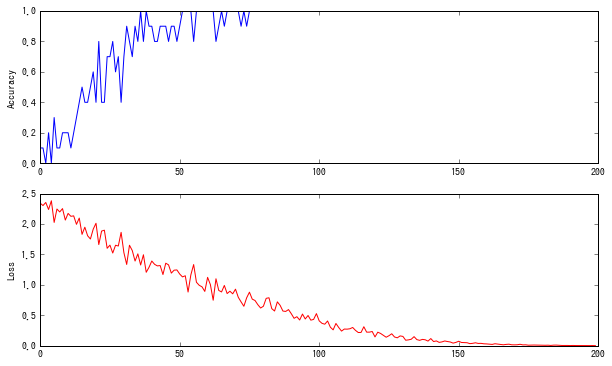

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(acc, label='acc', color='b')
ax[0].set(ylabel='Accuracy', ylim=(0, 1))
ax[1].plot(loss, label='loss', color='r')
ax[1].set(ylabel='Loss')
#ax.legend()

In [20]:
def char_to_vec(letter):
    seed = [char_to_ix[letter]]
    vec = np_utils.to_categorical(seed, nb_classes=vocab_size)
    return vec[:, np.newaxis, :]

In [21]:
#plt.bar(np.arange(len(pred_proba[0])), pred_proba[0]);

In [22]:
# この文字をシードとして用いて後の系列を生成
#curr_char = "A"
curr_char = u"あ"

all_pred_proba = []

for i in range(50):
    curr_vec = char_to_vec(curr_char)
    pred_proba = model.predict(curr_vec)
    #pred_ix = np.argmax(pred_proba)
    pred_ix = np.random.choice(chars_ix, p=pred_proba[0])
    
    next_char = ix_to_char[pred_ix]
    next_x = char_to_vec(next_char)
    #print curr_char, '->', next_char
    print curr_char,
    
    curr_char = next_char
    
    all_pred_proba.append(pred_proba)
    
model.reset_states()

あ い う え お か き く け こ あ い う え お か き く け こ あ い う え お か き く け こ あ い う え お か き く け こ あ い う え お か き く け こ


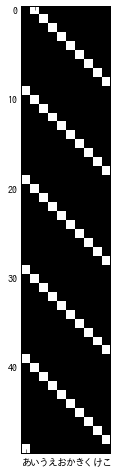

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(np.array(all_pred_proba)[:, 0, :], interpolation='nearest', cmap='gray')
ax.set_xticks(np.arange(len(chars)))
ax.set_xticklabels(list(chars));

In [24]:
weights = model.get_weights()

In [25]:
len(weights)

5

In [26]:
for w in weights:
    print w.shape

(10, 50)
(50, 50)
(50,)
(50, 10)
(10,)


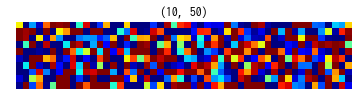

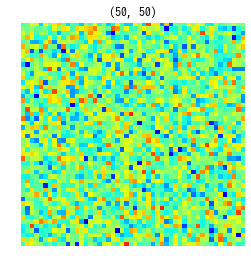

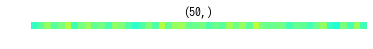

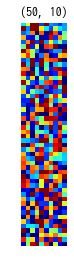

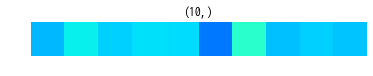

In [27]:
nb_figure = len(weights)

#fig, ax = plt.subplots(nb_figure, 1)

for ii in range(nb_figure):
    #weights[ii].shape
    plt.figure()
    plt.imshow(np.atleast_2d(weights[ii]), interpolation='nearest', clim=(-0.5, 0.5));
    plt.axis('off')
    plt.title(weights[ii].shape)